<a href="https://colab.research.google.com/github/MarcoColaci/MLPNS2021/blob/main/MidTerm_MarcoColaci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the packages
import numpy as np
import pandas as pd
import pylab as pl
import scipy.optimize
from sklearn import preprocessing
from sklearn.cluster import KMeans

pl.rcParams['font.size']=18

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/midterm/country_pop.csv')

In [3]:
df.shape

(264, 62)

In [4]:
a=df.dropna(axis='columns',how='all')
a=a.dropna(axis='rows',how='any')
dfc=a
dfc.shape

(258, 61)

In [5]:
dfc.head()

,Data Source,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


Time Series:
x_axis=lista di tutti gli anni (as float)
dfc.iloc[i,1:len(dfc)] : popolazione per tutti gli anni (nella x_axis) per ogni country 
(i scorre tutte le country)

Text(0, 0.5, 'Population')

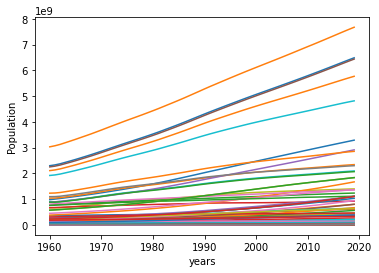

In [6]:
x_axis=dfc.columns[1:len(dfc)].astype('float')

for i in range(len(dfc)) :
  pl.plot(x_axis,dfc.iloc[i,1:len(dfc)])


pl.xlabel('years')
pl.ylabel('Population')

Text(0, 0.5, 'Population')

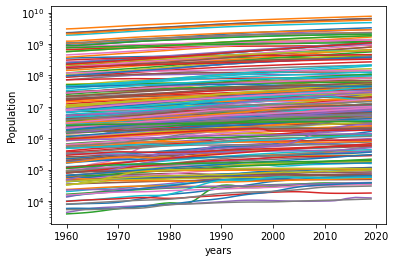

In [7]:
for i in range(len(dfc)) :
  pl.plot(x_axis,dfc.iloc[i,1:len(dfc)])
  pl.yscale('log')

pl.xlabel('years')
pl.ylabel('Population')


Task1.IV
scale date and replot

In [8]:
#(X[0,1:len(X)]-X[0,1:len(X)].mean())/X[0,1:len(X)].std()
X1=dfc.values
for i in range(len(X1)):
  X1[i,1:len(X1)]=(X1[i,1:len(X1)]-X1[i,1:len(X1)].mean())/X1[i,1:len(X1)].std()


In [9]:
dff=pd.DataFrame(X1[:,1:len(X1)])
dff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-1.15488,-1.09064,-1.04943,-1.02482,-1.00718,-0.990006,-0.971419,-0.953618,-0.936287,-0.918486,-0.900841,-0.881103,-0.86016,-0.83906,-0.824138,-0.817384,-0.821101,-0.83262,-0.84639,-0.85283,-0.846756,-0.822096,-0.781362,-0.736544,-0.703297,-0.693349,-0.71335,-0.755812,-0.795289,-0.79775,-0.739267,-0.609787,-0.42062,-0.197106,0.0225852,0.212328,0.362908,0.480764,0.576369,0.666842,0.763599,0.87067,0.980306,1.08633,1.17638,1.24413,1.28618,1.30649,1.31361,1.31869,1.3299,1.34963,1.37655,1.40791,1.44011,1.46979,1.4976,1.52346,1.54854,1.5731
1,-1.08455,-1.06458,-1.0435,-1.02129,-0.997949,-0.973451,-0.948146,-0.922079,-0.894618,-0.864889,-0.832479,-0.797529,-0.760961,-0.724164,-0.688961,-0.656974,-0.627567,-0.601139,-0.581465,-0.573375,-0.579691,-0.601097,-0.634581,-0.674511,-0.713124,-0.743938,-0.767334,-0.782579,-0.781019,-0.751967,-0.689035,-0.58635,-0.448943,-0.2948,-0.148987,-0.0291367,0.056881,0.115211,0.159291,0.209444,0.279982,0.375757,0.490842,0.615923,0.737033,0.844454,0.934639,1.01194,1.08394,1.16182,1.25339,1.36131,1.4822,1.61054,1.73807,1.85883,1.9711,2.07687,2.17831,2.27899
2,-1.08027,-1.07039,-1.06044,-1.05128,-1.04411,-1.03952,-1.03815,-1.03905,-1.03938,-1.0353,-1.02406,-1.00464,-0.977817,-0.94575,-0.911616,-0.877714,-0.844731,-0.811912,-0.77874,-0.744226,-0.707665,-0.669047,-0.628706,-0.586732,-0.543273,-0.498447,-0.452218,-0.404566,-0.355667,-0.305744,-0.254933,-0.20323,-0.150501,-0.0965826,-0.0412419,0.0157462,0.0745485,0.135331,0.198331,0.263814,0.332052,0.403088,0.477142,0.554862,0.63705,0.724245,0.816712,0.914235,1.01625,1.12193,1.23062,1.34221,1.45675,1.57394,1.69348,1.81516,1.93884,2.06461,2.1928,2.32389
3,-2.30925,-2.20214,-2.09393,-1.98619,-1.87799,-1.7716,-1.66704,-1.55988,-1.44085,-1.31604,-1.20308,-1.09308,-0.97699,-0.86436,-0.752264,-0.637364,-0.52459,-0.409032,-0.298305,-0.190002,-0.0762405,0.0372985,0.159581,0.28493,0.411932,0.538648,0.660198,0.788252,0.911603,1.0914,1.21448,1.17299,1.13151,1.09002,1.04854,1.00706,0.965574,0.92409,0.882607,0.841122,0.79964,0.739038,0.719793,0.695863,0.669237,0.636784,0.597004,0.549685,0.502002,0.460427,0.429978,0.413541,0.403472,0.392322,0.379745,0.362101,0.352435,0.346882,0.33201,0.306418
4,-1.63437,-1.59305,-1.55041,-1.50576,-1.46046,-1.41417,-1.36712,-1.31951,-1.27099,-1.22094,-1.16874,-1.11375,-1.05663,-0.9992,-0.944002,-0.893218,-0.847276,-0.804677,-0.763279,-0.716951,-0.663424,-0.602012,-0.532842,-0.457716,-0.378904,-0.297735,-0.21558,-0.132525,-0.0477136,0.0385982,0.126924,0.219579,0.31459,0.403859,0.476971,0.527241,0.549098,0.547683,0.539755,0.549526,0.593239,0.676851,0.792905,0.927172,1.0584,1.17081,1.26192,1.33439,1.38487,1.41063,1.41003,1.37995,1.32338,1.25253,1.18564,1.13412,1.10352,1.09084,1.09105,1.09688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,-2.11008,-2.04799,-1.9565,-1.86502,-1.77353,-1.68204,-1.59055,-1.49579,-1.4043,-1.31281,-1.22132,-1.12983,-1.02854,-0.930517,-0.829225,-0.731201,-0.629909,-0.531885,-0.433861,-0.332569,-0.234544,-0.133253,-0.0352284,0.0693308,0.177158,0.291519,0.405881,0.52351,0.647674,0.765303,0.879665,0.997294,1.10839,1.21622,1.32077,1.42533,1.52336,1.61158,1.21948,0.552917,0.350334,0.354104,0.357882,0.361659,0.365436,0.36922,0.414167,0.459481,0.505157,0.551199,0.597616,0.647674,0.7003,0.736278,0.71881,0.638512,0.603749,0.647684,0.667557,0.658287
254,-1.129,-1.11859,-1.10778,-1.09665,-1.08528,-1.07374,-1.06188,-1.04961,-1.03701,-1.02426,-1.01135,-0.998356,-0.984929,-0.970158,-0.952849,-0.932121,-0.907568,-0.879332,-0.84778,-0.813541,-0.777068,-0.73821,-0.696714,-0.652797,-0.606743,-0.558628,-0.509195,-0.458154,-0.403377,-0.341967,-0.272184,-0.192844,-0.10547

Text(0, 0.5, 'Population')

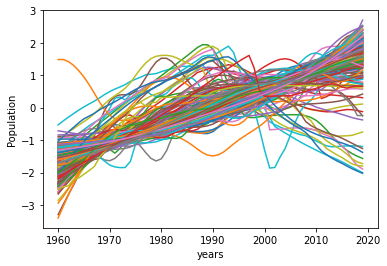

In [10]:
x_axis=dfc.columns[1:len(dfc)].astype('float')

for i in range(len(dff)) :
  pl.plot(x_axis,dff.iloc[i,0:len(dff)])


pl.xlabel('years')
pl.ylabel('Population')

Text(0, 0.5, 'Population')

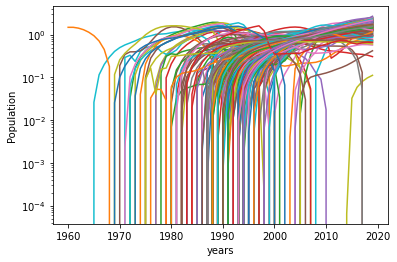

In [11]:
for i in range(len(dff)) :
  pl.plot(x_axis,dff.iloc[i,0:len(dff)])
  pl.yscale('log')

pl.xlabel('years')
pl.ylabel('Population')

In [12]:
# Inizio Task 2.I
def fit2(a,b,c,x):
  return a*x**2+b*x+c

def l2(args,x,y):
  a,b,c=args
  return sum((y - fit2(a, b,c, x))**2)